<a href="https://www.kaggle.com/code/wonduk/eda-ml-lstm-classification-on-spam-email?scriptVersionId=159636292" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# <div style="text-align: center; background-color: #649eff; color: white; padding: 14px; line-height: 1;border-radius:10px">📮EDA & Classification on Spam Email Dataset</div>

![image](https://thumbs.dreamstime.com/b/spam-mail-printed-wooden-cube-spam-mail-printed-wooden-cubes-193211215.jpg)

<cite>Image source: https://www.dreamstime.com/photos-images/spam-mail.html

*** 

> <h2> 1. About Dataset </h2>

<br>
The dataset <b>'Spam Email'</b> contains <b>2 columns</b>, each are:
<br>

* <b>Category</b>:     Whether it is spam or ham

* <b>Message</b>:      context of message

> <h2> 2. Notebook Objectives </h2>

<br> 
<b>Goal of this notebook is to:</b><br>

<br>

1.📊<b><mark>Explore</mark></b> each columns' <b><mark>distribution</mark></b> in the dataset <br>

2.📉Analysis on <b style='color:blue'>ham messages</b> <br>

3.📈Analysis on <b style='color:red'>spam messages</b> <br>

4.0️⃣1️⃣<b style = 'color:green'>Binary Classification </b> with no tuned ML models (model comparison) and Neural Network

<a id="top"></a>
> <div class="list-group" id="list-tab" role="tablist">
 <h2>3.Table of Contents</h2>
    
   * [1. Load necessary libraries and dataset](#1)
   * [2.EDA on features (length added)](#2)
    - [2.1. Distribution of each categories](#2.1)
    - [2.2. Length distribution of spam & ham meesage](#2.2)
   * [3. Ham & Spam Analysis](#3)
    - [3.1. define functions](#3.1)  
    - [3.2. Term frequency by ham message](#3.2)
        - [3.2.1. bar plot of ham message](#3.2.1)
        - [3.2.2. Word cloud of ham message](#3.2.2)
    - [3.3. Term frequency by spam message](#3.3)
        - [3.3.1. bar plot of spam message](#3.3.1)
        - [3.3.2. Word cloud of spam message](#3.3.2)
   * [4. Text preprocessing for spam email detection](#4)
        - [4.1. define preprocessing function](#4.1)  
        - [4.2. CountVectorizer](#4.2) 
        - [4.3. tf-idf transformer](#4.3) 
        - [4.4. Train-test split](#4.4) 
   * [5. Text Classification](#5)
       - [5.1. Define & Fit classifiers](#5.1)
       - [5.2.ML: Compare Evaluation Matrix](#5.2)
       - [5.3. ML: Cross Validation](#5.3)
       - [5.4. Voting classifier Added (cv)](#5.4)
       - [5.5. Voting Classifier: Model Evaluation](#5.5)
       - [5.6. LSTM Model](#5.6)

<a id="1"></a>
# <div style="text-align: left; background-color: #78aaff; color: white; padding: 10px; line-height: 1;border-radius:20px">1. Load Necessary Libraries and Dataset</div>

In [1]:
# for data
import pandas as pd
import numpy as np

# for visualization
import matplotlib as mpl
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno
import plotly.express as px
import plotly.figure_factory as ff
from plotly.subplots import make_subplots
import plotly.graph_objs as go
from wordcloud import WordCloud


# nltk used for NLP
import nltk
from nltk.util import ngrams
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

# Preprocessing (sklearn)
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline

# Modeling
from sklearn.ensemble import RandomForestClassifier
from lightgbm.sklearn import LGBMClassifier
import xgboost as xgb
from sklearn.svm import SVC
from catboost import CatBoostClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.model_selection import GridSearchCV, StratifiedKFold

# Neural Network
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Embedding, LSTM, Dense, Bidirectional, GlobalMaxPooling1D, Dropout
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

# scoring
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_curve, RocCurveDisplay

# styling
plt.style.use('ggplot')

/opt/conda/lib/python3.7/site-packages/geopandas/_compat.py:115: UserWarning: The Shapely GEOS version (3.9.1-CAPI-1.14.2) is incompatible with the GEOS version PyGEOS was compiled with (3.10.1-CAPI-1.16.0). Conversions between both will be slow.
  shapely_geos_version, geos_capi_version_string


read dataset:

Text(0.5, 1.0, 'Distribution of missing values')

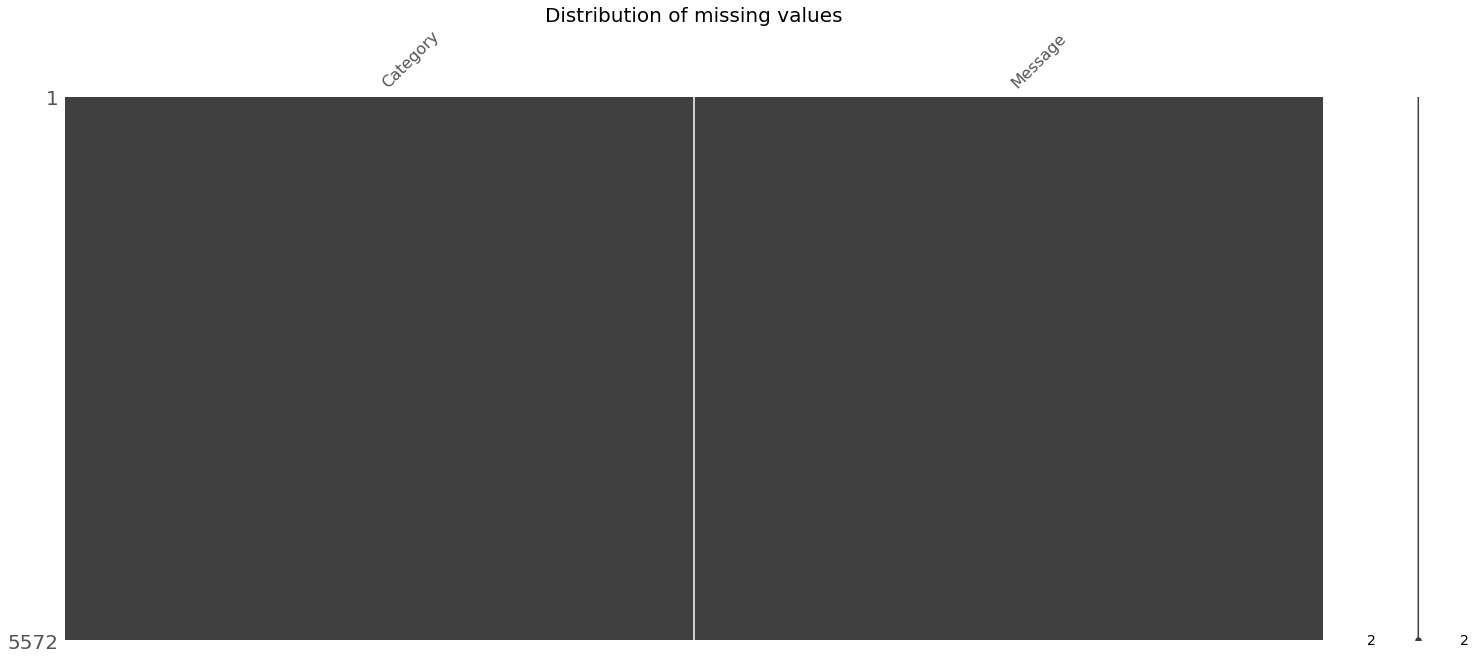

In [2]:
df = pd.read_csv('../input/spam-email/spam.csv')
msno.matrix(df).set_title('Distribution of missing values',fontsize=20)

<b>No missing value in the dataframe</b>

In [3]:
print(df.shape)
df.head(3)

(5572, 2)


,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...


<b> We can notice that this dataset consists of 2 columns with 5572 rows. I'll also add extra column 'length' in the next section.</b>




<a id="2"></a>
# <div style="text-align: left; background-color: #78aaff; color: white; padding: 10px; line-height: 1;border-radius:15px">2.EDA on features (length added)</div>

<h3> Two parts in 'EDA on each categories' section, each are:</h3>

* (1) Explore <b><mark>Distribution</mark></b> of each categories

* (2) Explore <b style='color:red'>ham</b> & <b style='color:blue'>spam</b> message <b>length</b> distribution 

<a id="2.1"></a>
## <div style="text-align: left; background-color: #92bbff; color: white; border-radius:15px;padding: 10px; line-height: 1">2.1. Distribution of each category</div>

In [4]:
category_ct = df['Category'].value_counts()

fig = px.pie(values=category_ct.values, 
             names=category_ct.index, 
             color_discrete_sequence=px.colors.sequential.OrRd,
             title= 'Pie Graph: spam or not')
fig.update_traces(hoverinfo='label+percent', textinfo='label+value+percent', textfont_size=15,
                  marker=dict(line=dict(color='#000000', width=2)))
fig.show()

<b> Ham category accounts for 86.6% with 4825 values in the dataset. </b>

<a id="2.2"></a>
## <div style="text-align: left; background-color: #92bbff; color: white; border-radius:15px;padding: 10px; line-height: 1">2.2. Length distribution of spam & ham meesage </div>

In [5]:
categories = pd.get_dummies(df["Category"])
spam_or_not = pd.concat([df, categories], axis=1)
spam_or_not.drop('Category',axis=1,inplace=True)

df["length"] = df["Message"].apply(len)

ham = df.loc[np.where(spam_or_not['ham'] == 1)].reset_index()
spam = df.loc[np.where(spam_or_not['ham'] == 0)].reset_index()

ham.drop('index',axis=1,inplace=True)
spam.drop('index',axis=1,inplace=True)

In [6]:
hist_data = [ham['length'],spam['length']]

group_labels = ['ham','spam']

colors = ['black', 'red']

# Create distplot with curve_type set to 'normal'
fig = ff.create_distplot(hist_data, group_labels, show_hist=False, colors=colors)

# Add title
fig.update_layout(title_text='Length distribution of ham and spam messages',
                 template = 'simple_white')
fig.show()

 <b style= 'color:red'>Spam</b> messages are mainly distributed right on 100 while 
    <b style = 'color:blue'>Ham </b>messages are distributed left on the length of 100.
    <br>
    <b>Thus, message tends to have more letters than hpam message</b>.

<a id="2.3"></a>
# <div style="text-align: left; background-color: #78aaff; color: white; padding: 10px; border-radius:20px;line-height: 1"> 3. Ham & Spam Message Analysis </div>

<h3> Here, we'll explore unigrams of ham & spam messages, using (1)barplot and (2)wordcloud. </h3>

* (1) define <b><mark>functions</mark></b>
* (2) Term frequency by <b style= 'color: blue'>ham</b> messages
    - barplot
    - word cloud
* (3) Term frequency by <b style= 'color: red'>spam</b> messages
    - barplot
    - word cloud

<a id="3.1"></a>
## <div style="text-align: left; background-color: #92bbff; color: white; padding: 10px;border-radius:15px; line-height: 1"> 3.1. define functions</div>

<h3>Defined 8 functions, each are:</h3>

* (1) <b>get_all_str()</b>:      to get all of strings from dataframe column.
* (2) <b>get_str()</b>:          get string from list
* (3) <b>get_word()</b>:         to get words from text, using RegexpTokenizer
* (4) <b>stopword_list()</b>:    to add stopwords to nltp stopword list
* (5) <b>remove_stopword()</b>:  to remove stopwords from list
* (6) <b>Freq_df()</b>: to get dataframe from cleanwordlist
* (7) <b>lemmatization()</b>: to lemmatize words

and also visualization function:

* (8) <b>Word_Cloud()</b>: plot word cloud of words

In [7]:
# function to get all of strings from dataframe column, and used lower function here.
def get_all_str(df):
    sentence = ''
    for i in range(len(df)):
        sentence += df['Message'][i]
    sentence = sentence.lower()
    return sentence

def get_str(lst):
    sentence = ''
    for char in lst:
        sentence += char+' '
    sentence = sentence.lower()
    return sentence

# function to get words from text(string). used RegexpTokenizer
def get_word(text): 
    result = nltk.RegexpTokenizer(r'\w+').tokenize(text.lower())
#     result = result.lower()                                              
#     result = nltk.word_tokenize(text)
    return result

# function to add stopwords to nltp stopword list.
def stopword_list(stop):
    lst = stopwords.words('english')
    for stopword in stop:
        lst.append(stopword)
    return lst

# function to remove stopwords from list.
def remove_stopword(stopwords, lst):
    stoplist = stopword_list(stopwords)
    txt = ''
    for idx in range(len(lst)):
        txt += lst[idx]
        txt += '\n'
    cleanwordlist = [word for word in txt.split() if word not in stoplist] 
    return cleanwordlist

# function to get dataframe from cleanwordlist.
def Freq_df(cleanwordlist):
    Freq_dist_nltk = nltk.FreqDist(cleanwordlist)
    df_freq = pd.DataFrame.from_dict(Freq_dist_nltk, orient='index')
    df_freq.columns = ['Frequency']
    df_freq.index.name = 'Term'
    df_freq = df_freq.sort_values(by=['Frequency'],ascending=False)
    df_freq = df_freq.reset_index()
    return df_freq

# function to lemmatize words
def lemmatization(words):
    lemm = WordNetLemmatizer()
    tokens = [lemm.lemmatize(word) for word in words]
    return tokens

<b> Visualization functions below:</b>

In [8]:
# function to plot word cloud of words
def Word_Cloud(data, color_background, colormap, title):
    plt.figure(figsize = (20,15))
    wc = WordCloud(width=800, 
               height=400, 
               max_words=100,
               colormap= colormap,
               max_font_size=140,
               min_font_size = 2,
               random_state=8888, 
               background_color=color_background).generate_from_frequencies(data)
    
    plt.imshow(wc, interpolation='bilinear')
    plt.title(title, fontsize=20)
    plt.axis('off')
    plt.show()

<a id="3.2"></a>
## <div style="text-align: left; background-color: #92bbff; color: white; padding: 10px;border-radius:15px; line-height: 1">3.2. Term frequency by <b style = 'color: blue'>ham</b> message</div>

In [9]:
ham.tail(3)

,Category,Message,length
4822,ham,"Pity, * was in mood for that. So...any other s...",57
4823,ham,The guy did some bitching but I acted like i'd...,125
4824,ham,Rofl. Its true to its name,26


<b>remove stopwords</b>

In [10]:
string = get_all_str(ham)
words = get_word(string)
removed = remove_stopword('1',words)
# show 10 words for example
print(removed[:10])

['go', 'jurong', 'point', 'crazy', 'available', 'bugis', 'n', 'great', 'world', 'la']


We can see the result of last 10 words

<a id="3.2.1"></a>
### <div style="text-align: left; background-color: #78aaff; color: white; padding: 10px;border-radius:15px; line-height: 1">3.2.1. <b>bar plot</b> of ham message</div>

In [11]:
freq_df = Freq_df(removed)
top_10 = freq_df[:10]

fig = px.bar(top_10, x = 'Term', y = 'Frequency',text = 'Frequency', color='Term',
             color_discrete_sequence=px.colors.sequential.PuBuGn, 
             title = 'Rank of Ham Terms',
             template = "simple_white"
              )

for idx in range(len(top_10)):
    fig.data[idx].marker.line.width = 2
    fig.data[idx].marker.line.color = "black"
    
fig.update_traces(textposition='inside',
                  textfont_size=11)
fig.show()

<b> 'u', '2', 'gt'</b> ranked top 3 words in ham category, which acutally means 'you', 'to'

<a id="3.2.2"></a>
### <div style="text-align: left; background-color: #78aaff; color: white; padding: 10px; border-radius:15px;line-height: 1">3.2.2. <b>Word cloud</b> of ham message</div>

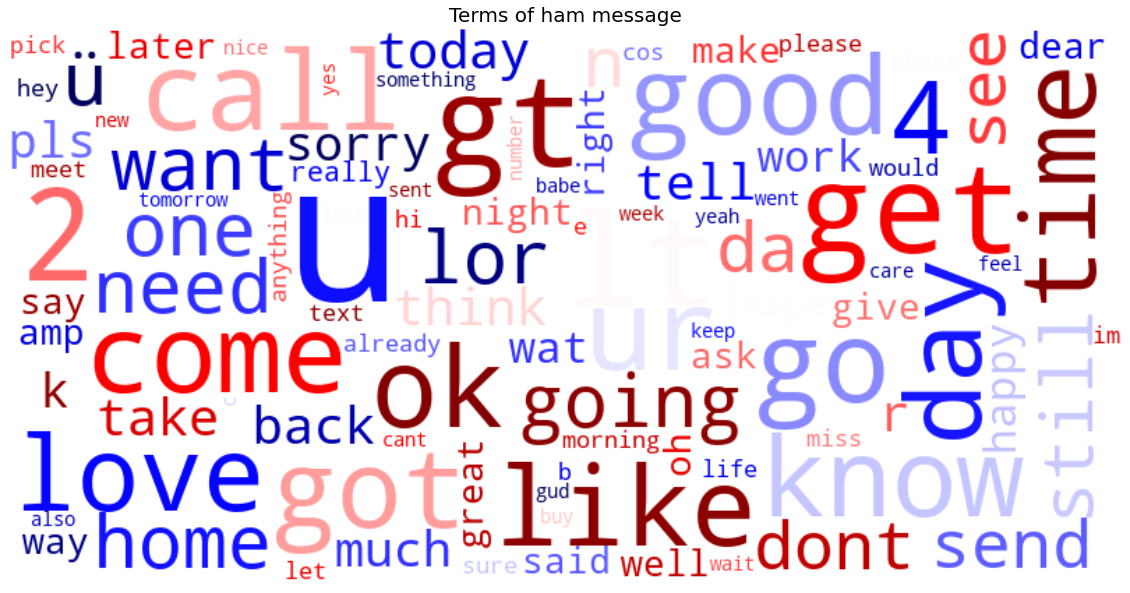

In [12]:
data = dict(zip(freq_df['Term'].tolist(), freq_df['Frequency'].tolist()))
data = freq_df.set_index('Term').to_dict()['Frequency']

ham_wordcloud = Word_Cloud(data ,'white', 'seismic', 'Terms of ham message')

<b>above is a word cloud of ham messages, now let's explore spam message in the next section.</b>

<a id="3.3"></a>
## <div style="text-align: left; background-color: #92bbff; color: white; padding: 10px; border-radius:15px ;line-height: 1">3.3. Term frequency by <b style="color:red"> spam</b> message</div>


In [13]:
string = get_all_str(spam)
words = get_word(string)
removed = remove_stopword('1',words)

<a id="3.3.1"></a>
### <div style="text-align: left; background-color: #78aaff; color: white; padding: 10px;border-radius:15px; line-height: 1">3.3.1. <b>bar plot</b> of spam message</div>

In [14]:
# plt.figure(figsize=(20,5))
# sns.barplot(data = freq_df[:10],
#             x = 'Term', y = 'Frequency')
freq_df = Freq_df(removed)
top_10 = freq_df[:10]

fig = px.bar(top_10, x = 'Term', y = 'Frequency',text = 'Frequency',
             color_discrete_sequence=px.colors.sequential.PuRd, 
             title = 'Rank of Spam Terms', 
             template = "simple_white",
             color='Term')

for idx in range(len(top_10)):
    fig.data[idx].marker.line.width = 2
    fig.data[idx].marker.line.color = "black"

fig.show()

<b>Obviously, <u>'call'</u>, <u>'2'</u>  and <u>'free'</u> ranked top 3 frequency terms in spam messages. Those words are commonly considered to be a spam words in our daily life.</b>

<a id="3.2.2"></a>
### <div style="text-align: left; background-color: #78aaff; color: white; padding: 10px;border-radius:15px; line-height: 1">3.3.2. <b>Word cloud</b> of spam message</div>

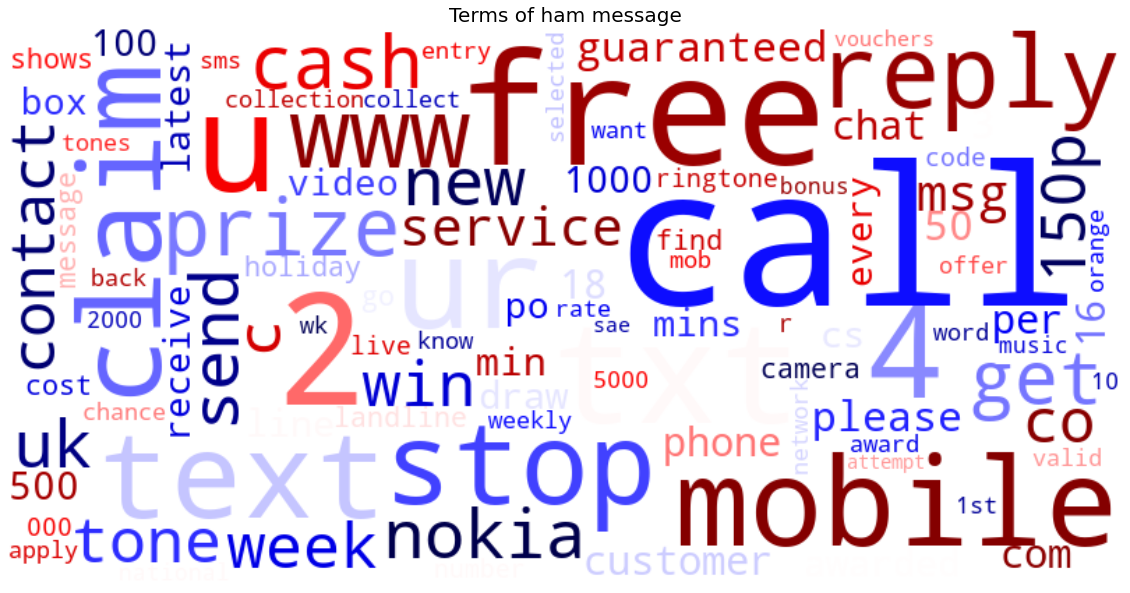

In [15]:
data = dict(zip(freq_df['Term'].tolist(), freq_df['Frequency'].tolist()))
data = freq_df.set_index('Term').to_dict()['Frequency']

spam_wordcloud = Word_Cloud(data, 'white','seismic', 'Terms of ham message')

Additionally it is obvious that word cloud of spam category is quite <br>different from ham category, as it also involves terms such as <b style= 'color:red'>free, prize, win, awarded</b>.

<a id="4"></a>
# <div style="text-align: left; background-color: #78aaff; color: white; padding: 10px; border-radius:20px;line-height: 1"> 4. Text preprocessing for spam email detection</div>

<h3>Preprocess dataframe for classification in the next section </h3>

<a id="4.1"></a>
## <div style="text-align: left; background-color: #92bbff; color: white; padding: 10px;border-radius:15px; line-height: 1">4.1. define preprocessing function </div>

<b>function to get words from sentence, and lemmatize it with removing stopwords.</b>

In [16]:
def preprocess(sentence):
    words = get_word(sentence)
    words_ltz = lemmatization(words)
    removed = remove_stopword('1',words_ltz)
    return removed

<b>and also replace 'ham' value into 1, 'spam' value into 0.</b>

In [17]:
df.replace('ham',1,inplace=True)
df.replace('spam',0,inplace=True)

In [18]:
df.head()

,Category,Message,length
0,1,"Go until jurong point, crazy.. Available only ...",111
1,1,Ok lar... Joking wif u oni...,29
2,0,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,1,U dun say so early hor... U c already then say...,49
4,1,"Nah I don't think he goes to usf, he lives aro...",61


<a id="4.2"></a>
## <div style="text-align: left; background-color: #92bbff; color: white; padding: 10px;border-radius:15px; line-height: 1">4.2. CountVectorizer</div>

<b><mark>CountVectorizer</mark> is used to convert text documents to a vector of term counts.</b>

In [19]:
vector = CountVectorizer(analyzer = preprocess)
X = vector.fit(df['Message'])
X_transform = X.transform(df['Message'])

<a id="4.3"></a>
## <div style="text-align: left; background-color: #92bbff; color: white; padding: 10px; border-radius:15px;line-height: 1">4.3. tf-idf transformer</div>

<b>Transform a count matrix to a normalized <mark>tf-idf</mark> representation.</b>

In [20]:
tfidf_transformer = TfidfTransformer().fit(X_transform)
X = tfidf_transformer.transform(X_transform)

<a id="4.4"></a>
## <div style="text-align: left; background-color: #92bbff; color: white; padding: 10px;border-radius:15px; line-height: 1">4.4. Train-test split</div>

<b>Split dataset into train set and test set, by ratio of 0.3</b>

In [21]:
train_X, test_X, train_y, test_y = train_test_split(X, df['Category'], test_size=0.30, random_state = 8888)    

<a id="5"></a>
# <div style="text-align: left; background-color: #78aaff; color: white; padding: 10px; border-radius:20px;line-height: 1"> 5. Text Classification</div>

<h4>Used 5 classification models in this notebook, each are: </h4><br>
<b style='color:blue'>RandomForestClassifier, LightGBMClassifier, XGBClassifier, SVC, CatBoostClassifier</b>

<a id="5.1"></a>
## <div style="text-align: left; background-color: #92bbff; color: white; padding: 10px;border-radius:15px; line-height: 1">5.1. Define classifiers</div>

<h4> Here i defined non-tuned classifiers first</h4>

In [22]:
rfc=RandomForestClassifier(random_state=8888)
lgbm = LGBMClassifier(boosting_type='gbdt',objective='binary',random_state=8888)
xgbr = xgb.XGBClassifier(objective='binary:hinge',random_state=8888)
svc = SVC(probability=True,random_state=8888)
catboost = CatBoostClassifier(random_state=8888, logging_level='Silent')

rfc.fit(train_X,train_y)
lgbm.fit(train_X, train_y)
xgbr.fit(train_X, train_y)
svc.fit(train_X, train_y)
catboost.fit(train_X,train_y,verbose=0)

classifiers = []
classifiers.append(svc)
classifiers.append(rfc)
classifiers.append(xgbr)
classifiers.append(lgbm)
classifiers.append(catboost)

model_name = ['SVC', 'Random Forest', 'XGBClassifier', 'LGBMClassifier', 'CatBoostClassifier']

<a id="5.2"></a>
## <div style="text-align: left; background-color: #92bbff; color: white; padding: 10px;border-radius:15px; line-height: 1">5.2. ML: Compare Evaluation Matrix</div>

<h4>Get matrix score of each classifiers</h4>

In [23]:
accuracy_list = []
auc_list=[]
recall_list = []
f1_list = []

for classifier in classifiers :
    y_pred=classifier.predict(test_X)
    y_pred_proba=classifier.predict_proba(test_X)[:,1]
    accuracy_list.append(accuracy_score(test_y,y_pred))
    auc_list.append(roc_auc_score(test_y, y_pred_proba))
    recall_list.append(recall_score(test_y, y_pred))
    f1_list.append(f1_score(test_y, y_pred))

<h4>And define plot function used for visualize scores and accuracy</h4>

In [24]:
def plot_model_score(model_name, accuracy_list, auc_list, recall_list, f1_list, title):

    fig = go.Figure(data=[
        go.Bar(name='Accuracy', x=model_name, y=np.round(accuracy_list,3), text=np.round(accuracy_list,3), marker_color='#97bad9'),    
        go.Bar(name='AUC',x=model_name, y=np.round(auc_list,3), text=np.round(auc_list,3), marker_color= '#bcd6ef'), 
        go.Bar(name='Recall',   x=model_name, y=np.round(recall_list,3), text=np.round(recall_list,3), marker_color='#ebcad9'),
        go.Bar(name='F1',       x=model_name, y=np.round(f1_list,3), text=np.round(f1_list,3), marker_color='#d5a6bd')
    ])
    
    fig.update_layout(template = 'simple_white', title = title)
    fig.update_layout(xaxis_title="Models", yaxis_title="Score", font = dict(size=17, family = 'Franklin Gothic'))
    fig.update_layout(yaxis_range=[0.7,1])
        
    fig.show()

In [25]:
plot_model_score(model_name, accuracy_list, auc_list, recall_list, f1_list,
                 'Accuracy, AUC, Recall Score & F1 Score')

* <b> Here we can see that <u style = 'color: green'>SVC</u> got highest AUC score, and <u style = 'color: green'>Random Forest</u> the next.</b> <br><br>
* <b> Consider that models may exist <u style = 'color:red'>overfitting</u>, let's see mean values of cross validation score.</b>

<a id="5.3"></a>
## <div style="text-align: left; background-color: #92bbff; color: white; padding: 10px; border-radius:15px;line-height: 1">5.3. ML: Cross Validation</div>

<h4> For Cross validation, i used stratifiedKFold, which returns stratified folds.</h4>

In [26]:
# set random_state
kfold = StratifiedKFold(n_splits=5,shuffle=True,random_state=8888)
cv_accuracy_results = []
cv_auc_results = []
cv_recall_results = []
cv_f1_results = []

for classifier in classifiers:
    cv_accuracy_results.append(cross_val_score(classifier, train_X, y = train_y, scoring = "accuracy", cv = kfold))
    cv_auc_results.append(cross_val_score(classifier, train_X, y= train_y, scoring = 'roc_auc', cv = kfold))
    cv_recall_results.append(cross_val_score(classifier, train_X, y= train_y, scoring = 'recall', cv = kfold))
    cv_f1_results.append(cross_val_score(classifier, train_X, y= train_y, scoring = 'f1', cv = kfold))
    

cv_accuracy_means = []
cv_auc_means = []
cv_recall_means = []
cv_f1_means = []

for fold in range(5):
    cv_accuracy_means.append(cv_accuracy_results[fold].mean())
    cv_auc_means.append(cv_auc_results[fold].mean())
    cv_recall_means.append(cv_recall_results[fold].mean())
    cv_f1_means.append(cv_f1_results[fold].mean())

In [27]:
plot_model_score(model_name, cv_accuracy_means, cv_auc_means, cv_recall_means, cv_f1_means, 'Cross Validation (5 fold)')

It can be easily seen that <b style = 'color:blue'>Random Forest, LGBMClassifier and CatBoostClassifier</b> got overall high score of each matrix.<br> Thus, i decided these three models to build an ensemble model using voting classifier.

<a id="5.4"></a>
## <div style="text-align: left; background-color: #92bbff; color: white; padding:10px;border-radius:15px; line-height: 1">5.4. Voting classifier Added (cv) </div>

<b> As mentioned above, i selected Random Forest, LGBMClassifier and CatBoostClassifier to build a voting classifier</b>

In [28]:
votingC = VotingClassifier(estimators=[('light gbm', lgbm),('Random Forest', rfc),
                                       ('Cat boost',catboost)],voting='soft')

votingC = votingC.fit(train_X, train_y)

v_accuracy = cross_val_score(votingC, train_X, y = train_y, scoring = "accuracy", cv = kfold)
v_auc = cross_val_score(votingC, train_X, y = train_y, scoring = "roc_auc", cv = kfold)
v_recall = cross_val_score(votingC, train_X, y = train_y, scoring = "recall", cv = kfold)
v_f1 = cross_val_score(votingC, train_X, y = train_y, scoring = "f1", cv = kfold)

votingC_accuracy_mean = v_accuracy.mean()
votingC_auc_mean = v_auc.mean()
votingC_recall_mean = v_auc.mean()
votingC_f1_mean = v_auc.mean()

model_name.append('Voting Classifier')
cv_accuracy_means.append(votingC_accuracy_mean)
cv_auc_means.append(votingC_auc_mean)
cv_recall_means.append(votingC_recall_mean),
cv_f1_means.append(votingC_f1_mean)

In [29]:
plot_model_score(model_name, cv_accuracy_means, cv_auc_means, cv_recall_means, cv_f1_means,
                 'cross validation (5 fold), Voting Classifier Added')

<a id="5.5"></a>
## <div style="text-align: left; background-color: #92bbff; color: white; padding: 10px; border-radius:30px; line-height: 1">5.5. Voting Classifier: Model Evaluation</div>

In [30]:
voting_y_pred = votingC.predict(test_X)
voting_y_pred_proba=votingC.predict_proba(test_X)[:,1]

In [31]:
voting_y_pred

array([1, 1, 1, ..., 0, 1, 1])

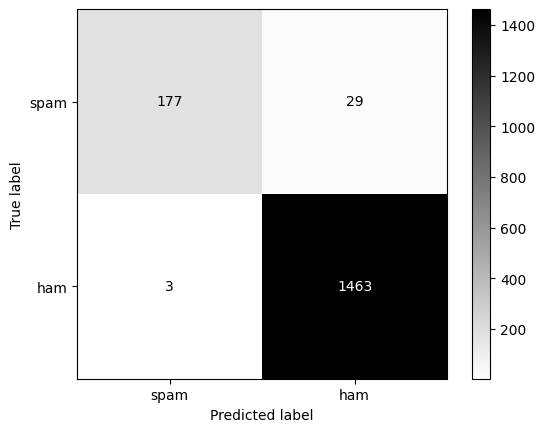

In [32]:
plt.style.use('default')
cm = confusion_matrix(test_y, voting_y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=['spam','ham'])
disp.plot(cmap='binary')

<a id="5.6"></a>
## <div style="text-align: left; background-color:#92bbff; color: white; padding: 10px;border-radius:15px; line-height: 1">5.6. LSTM Model </div>

In [33]:
X = df['Message']
y = df['Category']

train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.3, random_state = 8888)    
max_len = max(max(train_X.apply(len).values),max(test_X.apply(len).values))

def fit_tokenizer(text, oov_token):
    tokenizer = Tokenizer(oov_token = oov_token)
    tokenizer.fit_on_texts(text)
    return tokenizer

# for sequence, padding
def seq_padding(sentences, tokenizer, padding, truncating, maxlen):
    sequences = tokenizer.texts_to_sequences(sentences)    
    pad_trunc_sequences = pad_sequences(sequences, padding = padding, maxlen = maxlen, truncating=padding)
    return pad_trunc_sequences

tokenizer = fit_tokenizer(train_X, "<OOV>")

word_index = tokenizer.word_index
VOCAB_SIZE = len(word_index)

train_X = seq_padding(train_X,tokenizer, 'post', 'post',max_len)
test_X = seq_padding(test_X,tokenizer, 'post', 'post', max_len) 

def callback(MATRIX, PATIENCE):
    
    callbacks = [EarlyStopping(monitor=MATRIX, 
                                patience=PATIENCE, 
                                restore_best_weights=True), 
                  ModelCheckpoint('model',
                                  monitor=MATRIX,
                                  save_best_only=True, 
                                  save_weights_only=True)]
    return callbacks
        
def LSTM_model(vocab_size, embedding_dim, maxlen):
    
    model = Sequential()
    
    model.add(Embedding(vocab_size+1,embedding_dim,input_length = maxlen))
    model.add(Bidirectional(LSTM(64,kernel_regularizer=keras.regularizers.l2(0.001))))
    
    tf.keras.layers.GlobalAveragePooling1D()

    model.add(Dense(6, activation = 'relu',kernel_regularizer=keras.regularizers.l2(0.001)))
    model.add(Dense(1, activation = 'sigmoid'))
    
    model.compile(loss = 'binary_crossentropy',
                  optimizer = tf.keras.optimizers.Adam(learning_rate=0.0001),
                  metrics = ['Accuracy']) 
    
    return model

model = LSTM_model(VOCAB_SIZE, 100, max_len)

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 910, 100)          740000    
_________________________________________________________________
bidirectional (Bidirectional (None, 128)               84480     
_________________________________________________________________
dense (Dense)                (None, 6)                 774       
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 7         
Total params: 825,261
Trainable params: 825,261
Non-trainable params: 0
_________________________________________________________________


In [34]:
history = model.fit(train_X, train_y, epochs = 8, batch_size = 8, callbacks = callback('Accuracy', 2))

test_prediction_label = (model.predict(test_X) >= 0.5).astype("int32")  
test_predict_proba = model.predict(test_X, verbose=0)

NN_accuracy = accuracy_score(test_y, test_prediction_label)
NN_AUC = roc_auc_score(test_y, test_prediction_label)
NN_recall = recall_score(test_y, test_prediction_label)
NN_f1 = f1_score(test_y, test_prediction_label)

print(NN_accuracy, NN_AUC, NN_recall, NN_f1)

Epoch 1/8
488/488 [==============================] - 35s 61ms/step - loss: 0.6046 - Accuracy: 0.8613
Epoch 2/8
488/488 [==============================] - 30s 61ms/step - loss: 0.2295 - Accuracy: 0.9569
Epoch 3/8
488/488 [==============================] - 30s 61ms/step - loss: 0.1090 - Accuracy: 0.9841
0.8767942583732058 0.5 1.0 0.9343530911408541


In [35]:
cv_accuracy_means.append(NN_accuracy)
cv_auc_means.append(NN_AUC)
cv_recall_means.append(NN_recall),
cv_f1_means.append(NN_f1)
model_name.append('NN')

In [36]:
plot_model_score(model_name, cv_accuracy_means, cv_auc_means, cv_recall_means, cv_f1_means,
                 'cross validation (5 fold)')